Machine Intelligence 2 - Exercise 1 - Principal Component Analysis

Group : Bramantyo Supriyatno, Julie Morgan, Poulami Ghosh

In [1]:
import numpy as np 
import numpy.linalg as LA 
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Exercise 1.1: PCA: 2-dimensional Toy Data

(a) Load the dataset pca-data-2d.dat and create a scatter plot of the centered data.

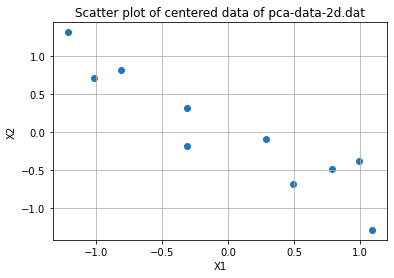

In [2]:
dataset = np.loadtxt('pca-data-2d.dat')
mean= dataset.mean(axis=0)
centred_data = dataset - mean
plt.scatter(centred_data[:,0], centred_data[:,1])
plt.title("Scatter plot of centered data of pca-data-2d.dat")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid();

(b) Determine the Principal Components (PCs) and create another scatter plot of the same data
points in the coordinate system spanned by the 2 PCs.

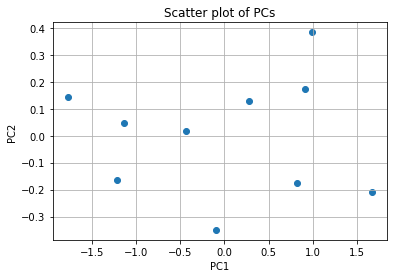

In [3]:
covariance = np.cov(centred_data.T)
eigen_value, eigen_vector = np.linalg.eig(covariance)

feature_values = centred_data@eigen_vector

plt.scatter(feature_values[:,0], feature_values[:,1])
plt.title("Scatter plot of PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid();

(c) PCA can be used to compress data e.g. using only information contained in the first M out
of N PCs. Plot the reconstruction of the data in the original coordinate system when using
(i) only the first or (ii) only the second PC for reconstruction.

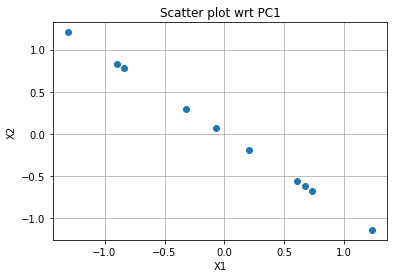

In [4]:
feature_values_PC1_temp = (centred_data@eigen_vector[:,0]).reshape((-1,1)) # 10x1
pc1_temp = eigen_vector[:,0].reshape((-1,1)) # 2x1
feature_values_PC1 = feature_values_PC1_temp@pc1_temp.T # 10x1 * 1x2 = 10x2

plt.scatter(feature_values_PC1[:, 0], feature_values_PC1[:, 1])
plt.title("Scatter plot wrt PC1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid();


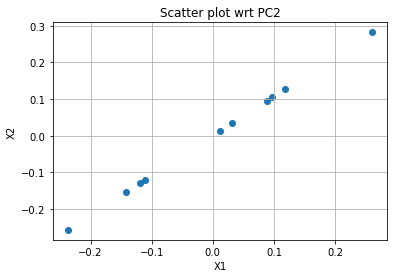

In [5]:
feature_values_PC2_temp = (centred_data@eigen_vector[:,1]).reshape((-1,1)) # 10x1
pc2_temp = eigen_vector[:,1].reshape((-1,1)) # 2x1
feature_values_PC2 = feature_values_PC2_temp@pc2_temp.T # 10x1 * 1x2 = 10x2


plt.scatter(feature_values_PC2[:, 0], feature_values_PC2[:, 1])
plt.title("Scatter plot wrt PC2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid();

# Exercise 1.2: PCA: 3-dimensional Toy Data


(a) read the data and scatter plot

In [6]:
filename = 'pca-data-3d.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=float)

scaler = StandardScaler(with_std = False)
scaler.fit(data)

centred_data = scaler.transform(data)

x_c = centred_data[:,0]
y_c = centred_data[:,1]
z_c = centred_data[:,2]

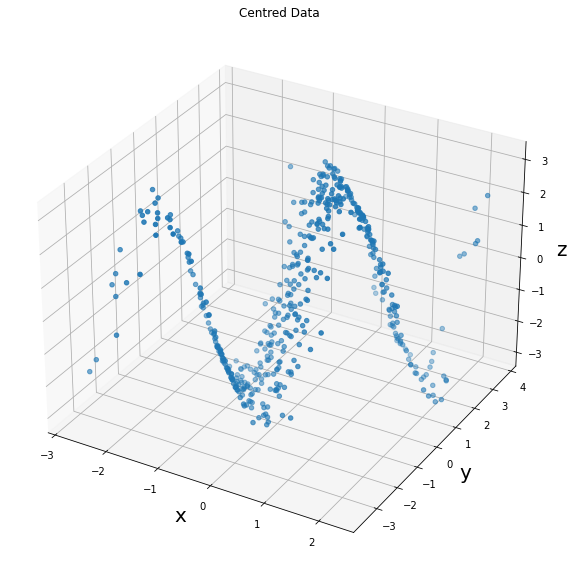

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x_c, y_c, z_c)
ax.set_xlabel('x', size = "20")
ax.set_ylabel('y', size = "20")
ax.set_zlabel('z', size = "20")
ax.set_title('Centred Data')

plt.show()

(b)

In [8]:
pca = PCA(n_components = 3)
pca.fit(centred_data)
pc = pca.transform(centred_data)
eigenvectors = pca.components_

In [9]:
PC1 = centred_data@eigenvectors[:,0].T
PC1 = PC1.reshape((-1, 1))

PC2 = centred_data@eigenvectors[:,1].T
PC2 = PC2.reshape((-1, 1))

PC3 = centred_data@eigenvectors[:,2].T
PC3 = PC3.reshape((-1, 1))

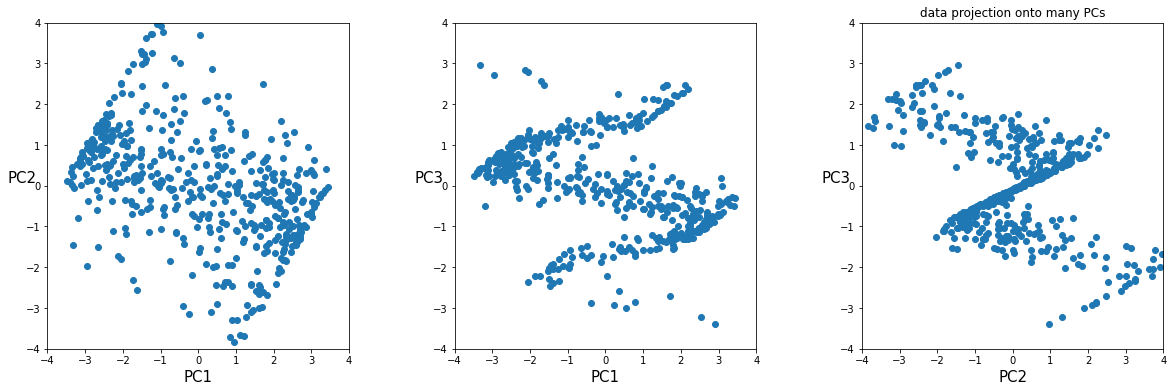

In [10]:
plt.figure(figsize = (20,6))

plt.subplot(131)
plt.scatter(PC1,PC2)
plt.xlabel("PC1", size = 15)
plt.ylabel("PC2", size = 15, rotation = "horizontal")
plt.ylim(-4,4)
plt.xlim(-4,4)

plt.subplot(132)
plt.scatter(PC1,PC3)
plt.xlabel("PC1", size = 15)
plt.ylabel("PC3", size = 15, rotation = "horizontal")
plt.ylim(-4,4)
plt.xlim(-4,4)

plt.subplot(133)
plt.scatter(PC2,PC3)
plt.xlabel("PC2", size = 15)
plt.ylabel("PC3", size = 15, rotation = "horizontal")
plt.ylim(-4,4)
plt.xlim(-4,4)

plt.title('data projection onto many PCs')
plt.subplots_adjust(wspace = 0.35)
plt.show()

In [11]:
proj1 = (centred_data@eigenvectors[:,0].T).reshape((-1,1))@(eigenvectors[:,0].reshape((1,-1)))
proj2 = (centred_data@eigenvectors[:,0:2])@eigenvectors[:,0:2].T
proj3 = centred_data@eigenvectors@eigenvectors.T

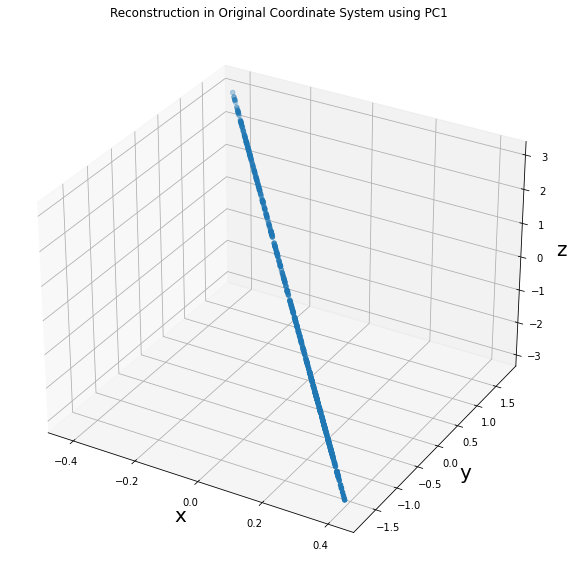

In [12]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(proj1[:,0],proj1[:,1], proj1[:,2])
ax.set_xlabel('x', size = "20")
ax.set_ylabel('y', size = "20")
ax.set_zlabel('z', size = "20")
ax.set_title('Reconstruction in Original Coordinate System using PC1')

plt.show()

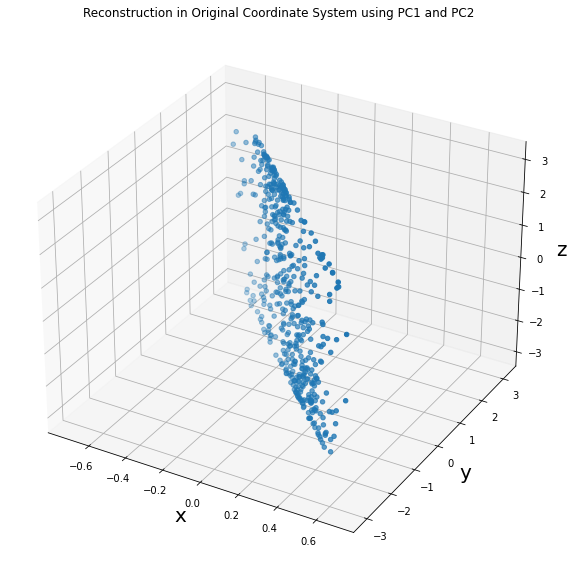

In [13]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(proj2[:,0],proj2[:,1], proj2[:,2])
ax.set_xlabel('x', size = "20")
ax.set_ylabel('y', size = "20")
ax.set_zlabel('z', size = "20")
ax.set_title('Reconstruction in Original Coordinate System using PC1 and PC2')

plt.show()

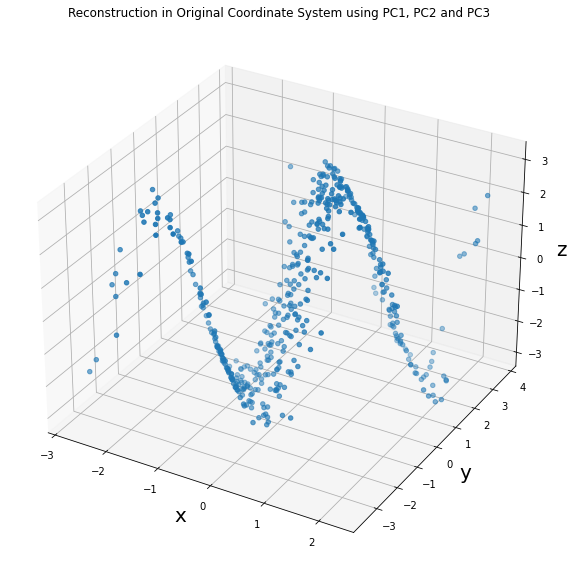

In [14]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(proj3[:,0],proj3[:,1], proj3[:,2])
ax.set_xlabel('x', size = "20")
ax.set_ylabel('y', size = "20")
ax.set_zlabel('z', size = "20")
ax.set_title('Reconstruction in Original Coordinate System using PC1, PC2 and PC3')

plt.show()

PC1 is very useful as it allows all of the data to be reduced down to a single line.

Using PC1 and PC2, the data can be reduced down to a 2D plane.

PC3 does not add any additional  dimensionality reduction or "interesting" directions in the data. Projecting onto all 3 PCAs returns the same plot as the original centred data.

# Exercise 1.3: Projections of a dynamical system

In [15]:
np.random.seed(10)

In [16]:
class PCA():
    def __init__(self, data):
        self.data = data
        self.mean = np.mean(self.data)
        self.centered = data - self.mean
        self.var = np.var(self.centered)
        self.cov = np.cov(self.centered)
        
        e_val, e_vec = LA.eig(self.cov)

        order = np.argsort(-1*e_val)
        self.e_val_sorted = e_val[order]
        self.e_vec_sorted = e_vec[:,order]
    
    def project(self, data, eigen_vec_order):
        e_vec = self.e_vec_sorted[:,eigen_vec_order]
        return e_vec.T@data, e_vec

    #def transform_all(self,data, keep_m = 2):   
    #    col = np.arange(0 ,keep_m, 1)
    #    pca_ed, e_vec  =  self.project(self.centered, col)
    #    
    #    recovered = pca_ed.T @ e_vec.T + self.mean
    #    error = np.mean(np.square(self.data - recovered.T))
    #    return pca_ed, error

    def transform(self, data, keep_m = 2, is_centered=False):
        if not is_centered:
            centered = data - self.mean
        else:
            centered = data
        col = np.arange(0 ,keep_m, 1)
        pca_ed, e_vec  =  self.project(centered, col)
        
        recovered = pca_ed.T @ e_vec.T + self.mean
        error = np.mean(np.square(data - recovered.T))
        return pca_ed, recovered, error
        
    def plot_scree(self, title='Scree Plot', num_m=-1):
        if num_m == -1:
            num_e_val = self.e_val_sorted.shape[0]
        else:
            num_e_val = num_m
            
        x = np.arange(0, num_e_val, 1)
        x_str = [str(a+1) for a in x]
        
        plt.figure(figsize=(num_e_val, 4))
        plt.bar(x, height=self.e_val_sorted[0:num_e_val], tick_label=x_str)
        plt.title(title)
        plt.xlabel('Principal Component')
        plt.ylabel('Eigen Value')
        plt.show()
    
    def plot_cov(self, title='Covariance Plot'):
        plt.imshow(self.cov)
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Feature')
        plt.show()

In [17]:
data = np.loadtxt('expDat.txt', skiprows=1, delimiter=',', usecols=np.arange(1,21)).T
data_shuffled = data.copy()
np.random.shuffle(data_shuffled)

#data = data.T
#data_shuffled = data_shuffled.T

In [18]:
pca1 = PCA(data)
pca2 = PCA(data_shuffled)

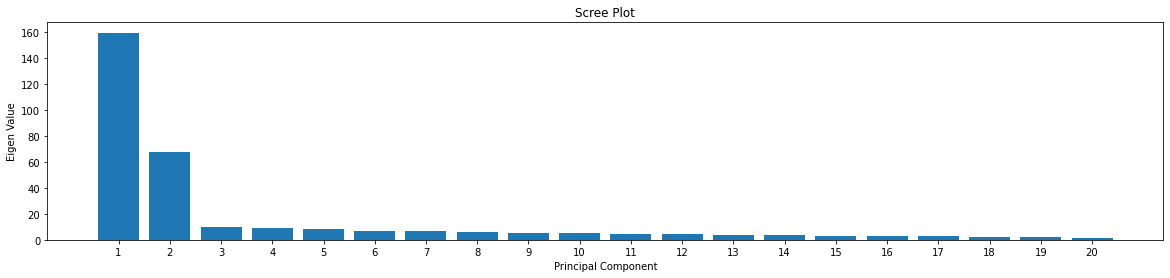

In [19]:
pca1.plot_scree('Scree Plot')

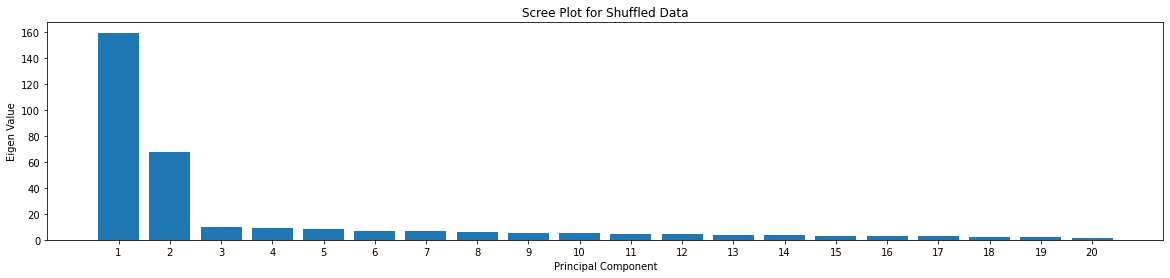

In [20]:
pca2.plot_scree('Scree Plot for Shuffled Data')

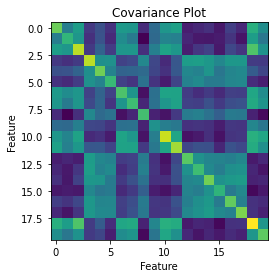

In [21]:
pca1.plot_cov()

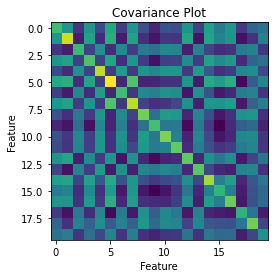

In [22]:
pca2.plot_cov()

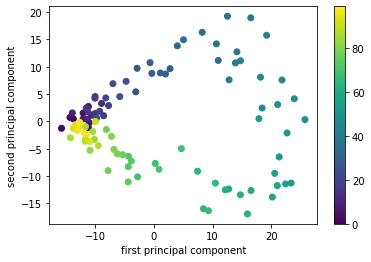

In [23]:
first_prj, _ = pca1.project(pca1.centered, 0)
sec_prj, _ = pca1.project(pca1.centered, 1)
t = np.arange(0, data.shape[1], 1)
plt.scatter(x=first_prj, y=sec_prj, c=t)
plt.colorbar()
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

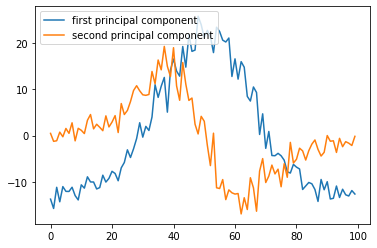

In [24]:
plt.plot(t, first_prj, label='first principal component')
plt.plot(t, sec_prj, label='second principal component')
plt.legend()
plt.show()

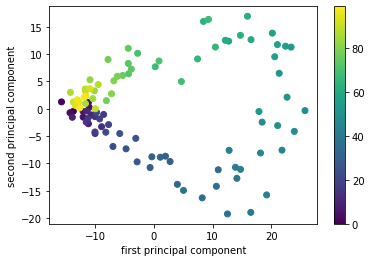

In [25]:
first_prj, _ = pca2.project(pca2.centered,0)
sec_prj, _ = pca2.project(pca2.centered,1)
t = np.arange(0, data.shape[1], 1)
plt.scatter(x=first_prj, y=sec_prj, c=t)
plt.colorbar()
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

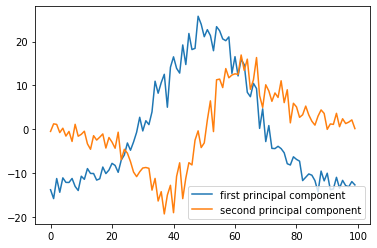

In [26]:
plt.plot(t, first_prj, label='first principal component')
plt.plot(t, sec_prj, label='second principal component')
plt.legend()
plt.show()

Discussion

Shuffling the row does not change the scree plot. The covariance matrix however was changed due to the order of the features. Reordering would make the plot similar. the plot of projection onto the first two principal components(PCs) indicates that the direction of the first principal component does not change at all. However the second PC for the shuffled data are the opposite of the second PC of the original data. However, this would not impose any problem since these PCS are still in the same line.

# Exercise 1.4: Image data compression and reconstruction

In [27]:
def get_patches(img, shape=(16, 16)):
    num_patch_y = int(np.floor(img.shape[0]/shape[0])) 
    num_patch_x = int(np.floor(img.shape[1]/shape[1]))
    ret = []
    for i in range(num_patch_x):
        for j in range(num_patch_y):
            patch = img[j*shape[0]:(j+1)*shape[0], i*shape[1]:(i+1)*shape[1]]
            ret.append(patch)
    return ret

In [28]:
def get_image_patches(dir_name, prefix='b', shape=(16,16)):
    g = glob.glob(os.path.join(dir_name, prefix + '*.jpg'))
    patches = []
    for filename in g:
        img = np.asarray(Image.open(filename))
        patches.extend(get_patches(img, shape))
    
    patches = np.array(patches).reshape((-1, shape[0]*shape[1])).T
    return patches

In [29]:
def visualize_pc(pca_instance, title='PC Images', num_pc=24):
    pc_vec = pca_instance.e_vec_sorted[:num_pc,:]
    num_col = 4
    num_row = int(num_pc/num_col)
    fig, ax = plt.subplots(num_row, num_col, figsize=(10,20))
    idx = 0
    
    for j in range(num_row):
        for i in range(num_col):
            img = pc_vec[idx,:].reshape((16,16))
            ax[j,i].imshow(img, cmap='gray')
            ax[j,i].set_title('PC {}'.format(idx))
            
            idx+=1
    
    fig.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

In [30]:
building = get_image_patches('imgpca')
text = get_image_patches('imgpca', 't')
drawing = get_image_patches('imgpca', 'd')
nature = get_image_patches('imgpca', 'n')

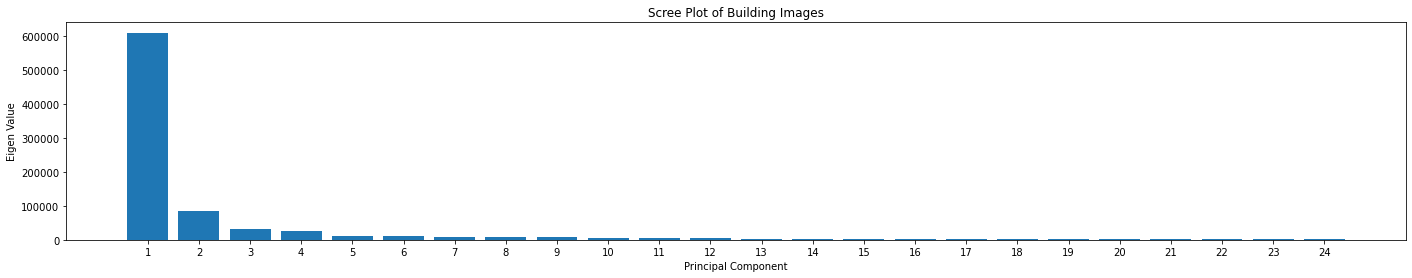

In [31]:
pca_b = PCA(building)
pca_b.plot_scree(title ='Scree Plot of Building Images', num_m=24)

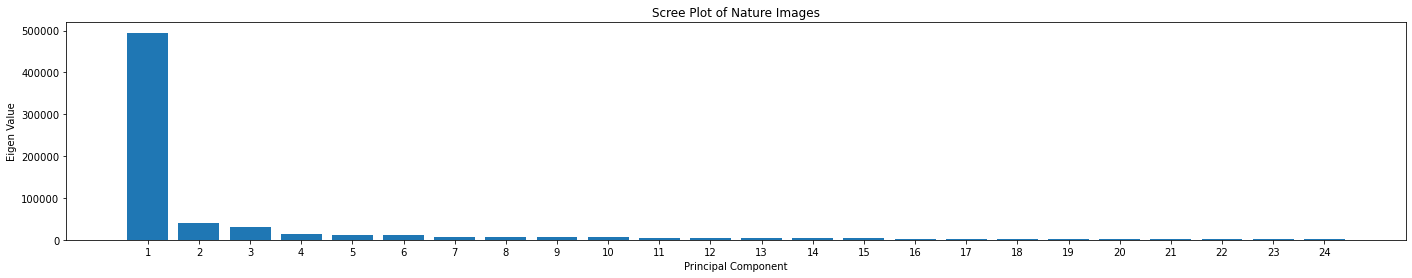

In [32]:
pca_n = PCA(nature)
pca_n.plot_scree(title ='Scree Plot of Nature Images', num_m=24)

Discussion:

Based on the scree plot alone, we can reduce the basis to only one PC. This yields in compression rate of 1 : 256

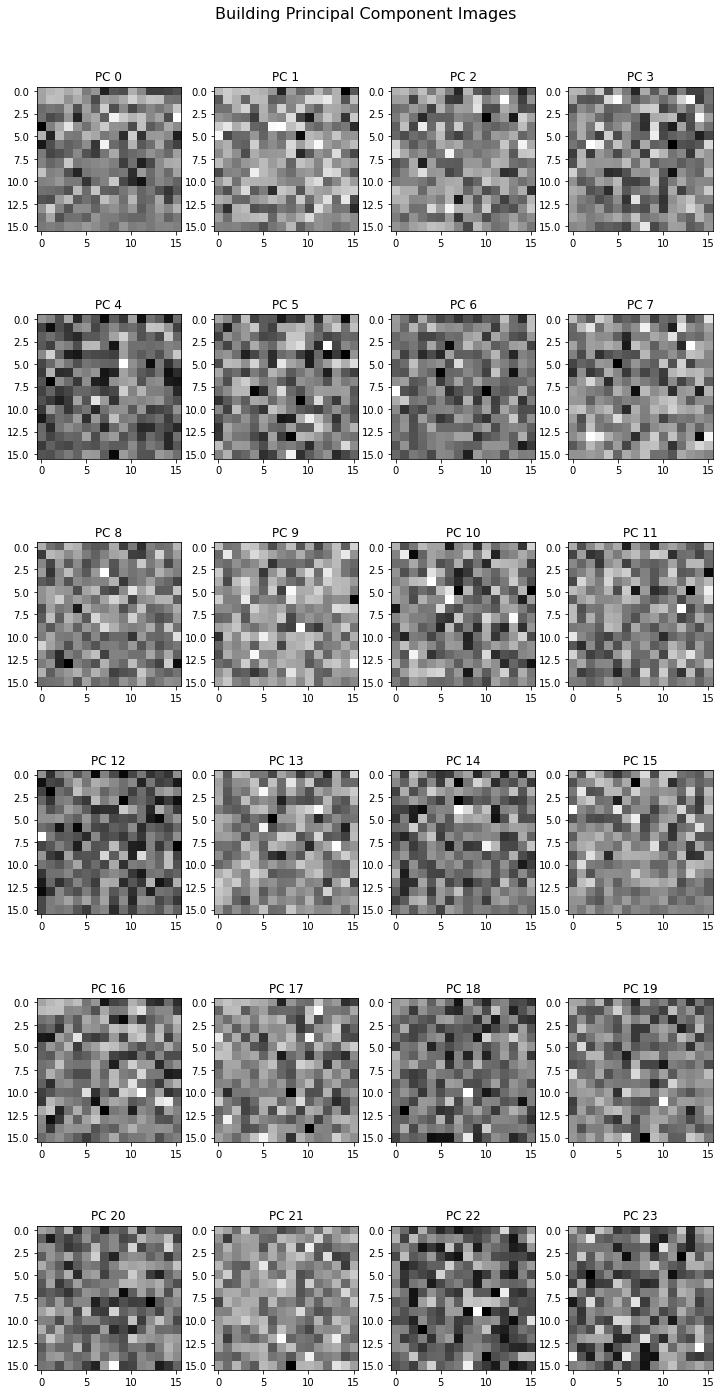

In [33]:
visualize_pc(pca_b, title='Building Principal Component Images')

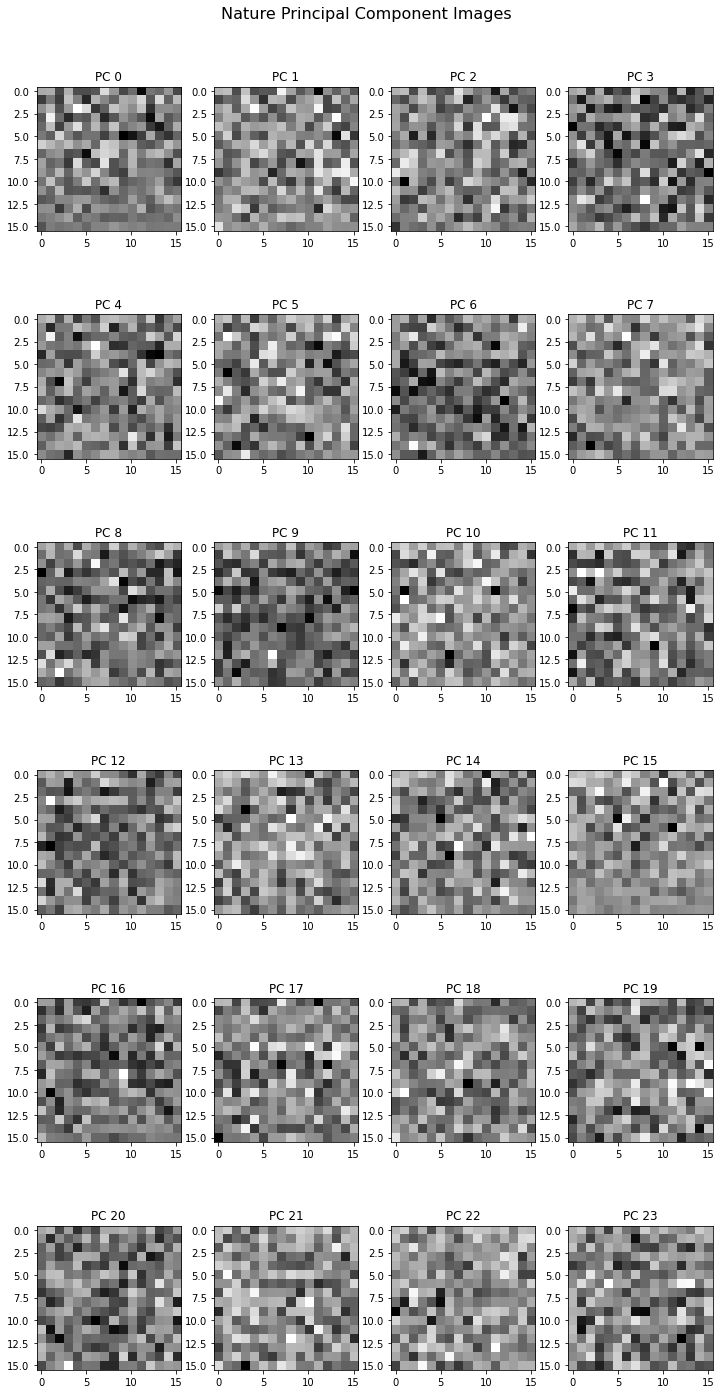

In [34]:
visualize_pc(pca_n, title='Nature Principal Component Images')

Discussion:

The PCs images are quiet hard to interpret since they look like a noise. However the pcs of the building images are certainly different from the pcs of the nature building. 

In [35]:
def transform_images(pca_instance, images, keep_m = 2, patch_size=(16, 16)):
    ret_images = []
    for image in images:
        img = np.array(get_patches(image, patch_size))

        num_row = int(np.floor(image.shape[0]/patch_size[0]))
        num_col = int(np.floor(image.shape[1]/patch_size[1]))
        
        img_v = img.reshape((img.shape[0], -1)).T

        _, recovered, error = pca_instance.transform(img_v, keep_m)
        recovered= recovered.reshape(img.shape)

        ret_img = np.zeros((num_row*patch_size[0], num_col*patch_size[1]))
        idx=0
        for i in range(num_col):
            for j in range(num_row):
                ret_img[j*patch_size[0]:(j+1)*patch_size[0], i*patch_size[1]:(i+1)*patch_size[1]] = recovered[idx]
                idx+=1
        ret_images.append(ret_img)
    return ret_images

In [36]:
b1 = np.asarray(Image.open('imgpca/b1.jpg'))

b2 = np.asarray(Image.open('imgpca/b2.jpg'))

b3 = np.asarray(Image.open('imgpca/b5.jpg'))

bs = [b1, b2, b3]
correct_proj_1 = transform_images(pca_b,  bs, keep_m=1)
correct_proj_5 = transform_images(pca_b,  bs, keep_m=5)
wrong_proj_1 = transform_images(pca_n,  bs, keep_m=1)
wrong_proj_5 = transform_images(pca_n,  bs, keep_m=5)

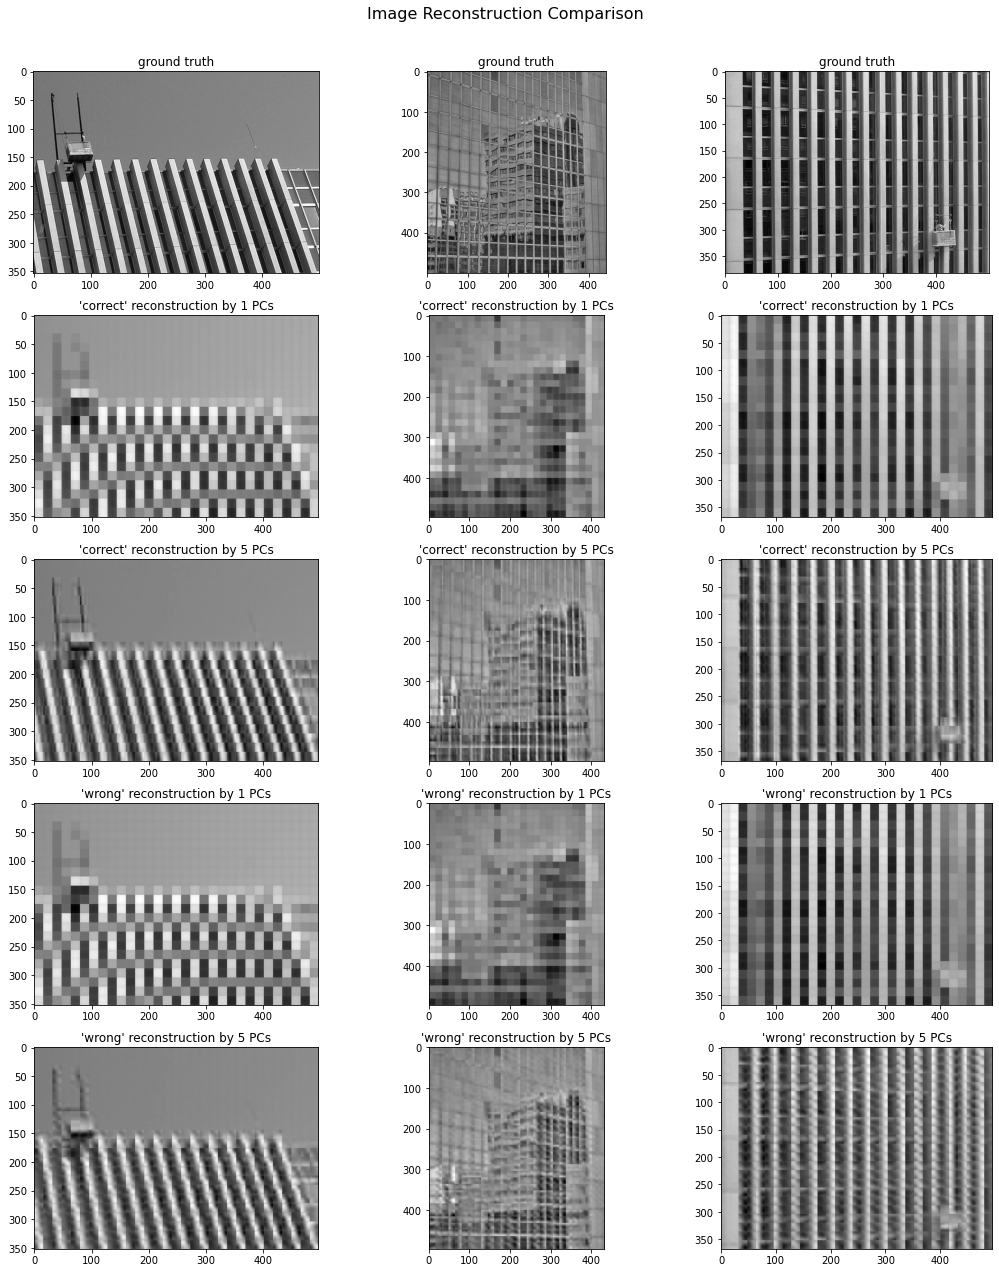

In [37]:
fig, ax = plt.subplots(5,3, figsize=(15,18))
for i, img in enumerate(bs):
    ax[0,i].imshow(img, cmap='gray')
    ax[0,i].set_title('ground truth')

    ax[1,i].imshow(correct_proj_1[i], cmap='gray')
    ax[1,i].set_title("'correct' reconstruction by 1 PCs")

    ax[2,i].imshow(correct_proj_5[i], cmap='gray')
    ax[2,i].set_title("'correct' reconstruction by 5 PCs")

    ax[3,i].imshow(wrong_proj_1[i], cmap='gray')
    ax[3,i].set_title("'wrong' reconstruction by 1 PCs")

    ax[4,i].imshow(wrong_proj_5[i], cmap='gray')
    ax[4,i].set_title("'wrong' reconstruction by 5 PCs")

fig.suptitle('Image Reconstruction Comparison' , fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

Discussion:

Although the scree plot indicates only one PC is enough to do compression, the reconstruction image shows quite the contrary. The image are still blurry and does not tell the real object is. adding more PC to the reconstruction certainly helps. 

Using wrong PC surprisingly does not affect the reconstruction that much. Recosntruction using only one wrong PC results in almost similar reconstruction. however when using more PC, it seems that the wrong PC does not improve the reconstruction compared to the original